<a href="https://colab.research.google.com/github/DamodaraBarbosa/estudos_data_science/blob/main/Imers%C3%A3o_de_Dados_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (20, 14)
parametros = {'axes.labelsize': 30, 'axes.titlesize': 40}
plt.rcParams.update(parametros)

In [271]:
database = pd.read_csv('data_alura.csv')

In [272]:
database.pop('Unnamed: 0')

0           0
1           1
2           2
3           3
4           4
        ...  
9151    10002
9152    10003
9153    10004
9154    10005
9155    10007
Name: Unnamed: 0, Length: 9156, dtype: int64

In [273]:
database['Valor real'].describe().round(2)

count       9156.00
mean     3052202.96
std      3944208.19
min        13000.00
25%       890000.00
50%      1800000.00
75%      3500000.00
max     65000000.00
Name: Valor real, dtype: float64

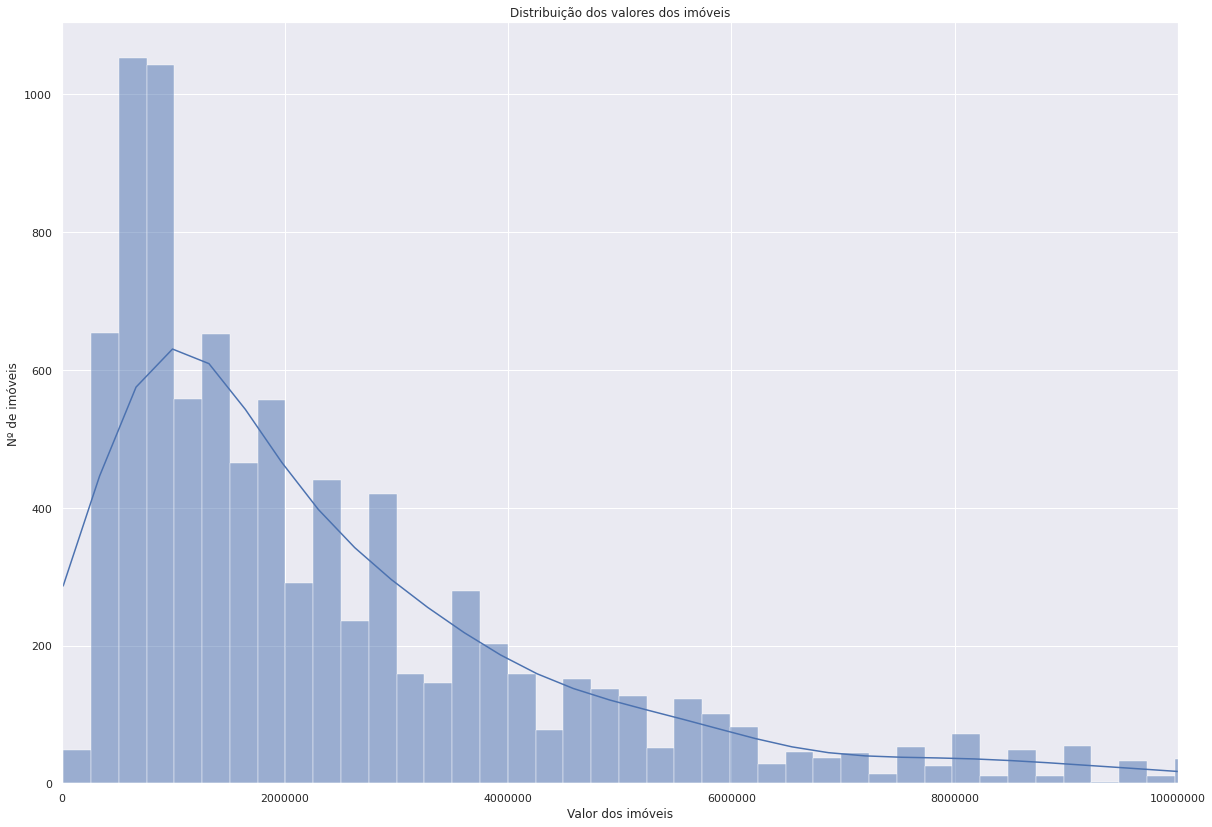

In [274]:
sns.set()
ax = sns.histplot(database, x = 'Valor real', kde = True)
plt.title('Distribuição dos valores dos imóveis')
plt.ylabel('Nº de imóveis')
plt.xlabel('Valor dos imóveis')
plt.xlim(-50, 10000000)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

Determinando o valor do m² em cada bairro

In [275]:
# determina-se a quantidade de bairros da cidade de São Paulo que aparecem na base de dados 

bairros = list()

for bairro in database['Bairro']:
  if bairro not in bairros:
    bairros.append(bairro)
  
print(bairros)
len(bairros)

['Planalto Paulista', 'Jardim dos Estados', 'Jardim Reimberg', 'Jardim Morumbi', 'Mooca', 'Santo Amaro', 'Cidade Mãe do Céu', 'Jardim Vergueiro', 'Jardim Benfica', 'Vila Alpina', 'Vila Monumento', 'Jardim Luzitânia', 'Vila Uberabinha', 'Jardim Prudência', 'Lauzane Paulista', 'Jardim Santa Maria', 'Vila Nova', 'Itaberaba', 'Vila Nova Conceição', 'Jardim da Saúde', 'Jardim Santo Antônio', 'Vila Mazzei', 'Vila Madalena', 'Jardim Ivana', 'Vila Campo Grande', 'Vila Gomes Cardim', 'Bela Aliança', 'Vila Albertina', 'Cidade Jardim', 'Parque da Lapa', 'Vila Libanesa', 'Cidade Domitila', 'Vila Nova Savoia', 'Jardim Maria Estela', 'Parque São Rafael', 'Vila Bandeirantes', 'Parque Colonial', 'Vila Califórnia', 'Jardim das Imbuias', 'Vila Tramontano', 'Vila Nancy', 'Parada Inglesa', 'Jardim Leonor Mendes de Barros', 'Jardim Iva', 'Jardim Amália', 'Vila dos Remédios', 'Brooklin Paulista', 'Tremembé', 'Vila Minerva', 'Pirituba', 'Vila Cordeiro', 'Chácara Santo Antônio (Zona Sul)', 'Jardim Guedala', '

698

In [ ]:
# itera-se a lista com o nome dos bairros para determinar o valor por m² de cada um dos bairros

valor_metragem_bairro = dict()

for bairro in bairros:
  dados_por_bairro = database.query(f'Bairro == "{bairro}"')
  valor_metragem_bairro[bairro] = dados_por_bairro['Valor real'].sum()/dados_por_bairro['Metragem'].sum()

valor_metragem_bairro

In [277]:
dados_valor_metragem_bairro = pd.DataFrame([valor_metragem_bairro])

In [278]:
# uso da função melt() para tornar as colunas do dataframe em linhas e organizar os dados

pd.options.display.float_format = '{:.2f}'.format
dados_valor_metragem_bairro = dados_valor_metragem_bairro.melt()
dados_valor_metragem_bairro.columns = ['Bairro', 'Valor por m² (R$/m²)']
dados_valor_metragem_bairro

,Bairro,Valor por m² (R$/m²)
0,Planalto Paulista,6327.54
1,Jardim dos Estados,9167.47
2,Jardim Reimberg,3040.00
3,Jardim Morumbi,6678.56
4,Mooca,5004.02
...,...,...
693,Parque São Jorge,4666.67
694,Vila Reis,4848.55
695,Parque das Árvores,8333.33
696,Vila São Pedro,5425.53


In [279]:
dados_valor_metragem_bairro.query('Bairro == "Aclimação"')

,Bairro,Valor por m² (R$/m²)
152,Aclimação,7162.69


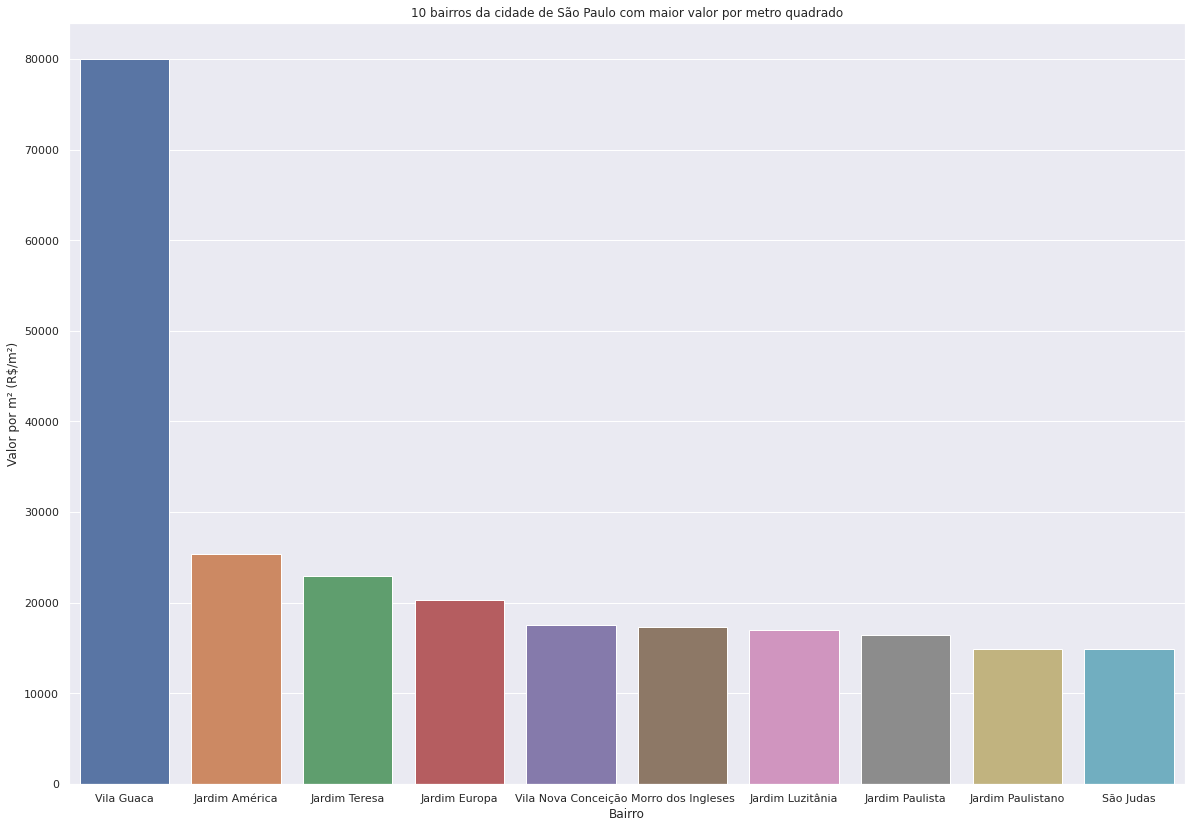

In [280]:
# gera-se um gráfico com os dez bairros com maior valor por m²

ranking_bairros_maior_valor_m2 = dados_valor_metragem_bairro.sort_values('Valor por m² (R$/m²)', ascending = False)[:10]

sns.set(font_scale = 1)
ax = sns.barplot(x = 'Bairro', y = 'Valor por m² (R$/m²)', data = ranking_bairros_maior_valor_m2)
plt.title('10 bairros da cidade de São Paulo com maior valor por metro quadrado')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [281]:
# utilizando o groupby

In [282]:
database['Valor por m² (R$/m²)'] = database['Valor real']/database['Metragem']

In [283]:
database_groups = database.groupby('Bairro')

In [284]:
database_groups = database_groups.mean()
database_groups

,Metragem,Quartos,Banheiros,Vagas,Valor real,Valor por m² (R$/m²)
Bairro,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,7656.17
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,5849.57
Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,7606.73
Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,5691.74
Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,11269.98
...,...,...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,4467.13
Água Branca,173.58,3.08,3.25,2.25,1226500.00,7269.11
Água Fria,165.42,2.83,3.42,2.50,927083.33,5841.10


In [288]:
bairros_com_mais_ocorrencias = database.value_counts('Bairro')[:10].index

In [289]:
# uso do arroba para indicar que há uso da variável dentro do query
# o uso do reset_index() torna o Index 'Bairro' em uma coluna

top_bairros = database_groups.query('Bairro in @bairros_com_mais_ocorrencias')
top_bairros.reset_index(inplace = True)
top_bairros

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor real,Valor por m² (R$/m²)
0,Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,11269.98
1,Brooklin Paulista,312.51,3.47,3.85,3.71,2124092.81,7264.92
2,Cidade Jardim,692.25,4.13,5.28,6.14,6095345.03,8563.84
3,Jardim Europa,566.18,3.79,4.73,5.03,11496061.43,19962.69
4,Jardim Guedala,2754.14,4.09,5.74,6.12,5102452.09,8028.00
5,Jardim Leonor,571.42,4.10,5.54,5.31,3801919.82,6563.88
6,Jardim Paulista,489.79,3.86,4.63,4.40,8030379.70,16087.45
7,Pacaembu,501.43,3.87,4.45,5.14,4339782.50,8768.36
8,Planalto Paulista,322.01,3.46,4.17,3.88,2037538.04,6447.72
9,Vila Madalena,334.60,3.73,3.97,3.60,2945722.37,9054.40


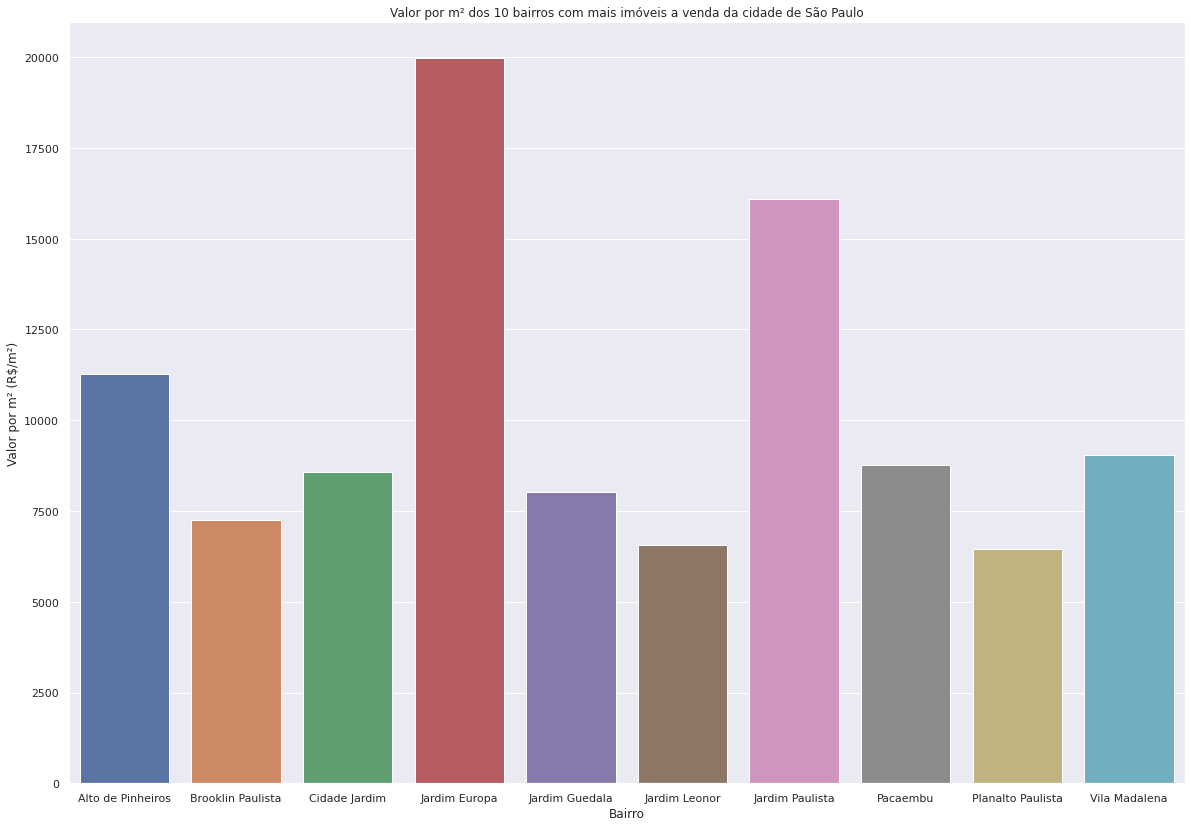

In [287]:
sns.set()
sns.barplot(x = 'Bairro', y = 'Valor por m² (R$/m²)', data = top_bairros)
plt.title('Valor por m² dos 10 bairros com mais imóveis a venda da cidade de São Paulo')
plt.show()